In [87]:
# Redes neuronales

Una red neuronal es como un cerebro muy sencillo hecho de matematicas esta formada por mmchas neuronas artificiales que son pequeñas unidades que ahcer calculos
cada neurona:
    recibe datos(por ejemplo los pixeles de una imagen o de una tabla)
    Los multiplica por unos valores llamados pesos (que indican que datos son mas importantes)
    suma todo y aplica una funcion (que decode si el resultado se activa o no )
    Envia el esultado a las siguientes neuronas.

la red tiene diferentes capas:
    Una capa de entrada (recibe datos)
    varias ocultas (procesan la informacion
    una capa de salida que da el resultado final como es un perro o es un gato dependiendo de x imagenes

durante el entrenamiento la red compara su respuesta con la correcta y ajusta los pesos para mejorar esto se repite miles de veces hasta que aprende a acertar por si sola y por esto los algoritmos de deep learning necesitan muchos datos

Resumen 
una red neuronal aprende a reconocer àtrones ajustando patrones poco a poco sus propios numeros internos segunos los errores que comete


SyntaxError: invalid syntax (3637533036.py, line 3)

## Clasificación Múltiple con el Dataset MINST
Que es 
MNIST es un conjunto de datos clasicos usado para entrenar y probar redes neuronales contiene 70k en escala d egrises de numeros escritos a mano del 0 al 9

60k para enternar

10k para pruebas

28x28x1 px / imagen

#### crear un entorno donde funcione TensorFlow
    conda create -n tf310 python=3.10 -y
#### activar el nuevo entorno
    conda activate tf310
#### actualizar el pip y luego instalar TensorFlow
    python -m pip install --upgrade pip && pip install TensorFlow
#### instalar jupyter e integrar este entorno como independiente en JupyterLab
    pip install jupyterlab ipykernel python -m ipykernel install --user --name=tf310 --display-name "TensorFlow (py310)"

## Explicacion de Tensores y TensorFlow

Un tensor es una forma de guardar datos en varias dimensiones Oiensa en ello como la version avanzada de lista o array

Ejemplos de datos - nivel tenso:
    Un numero  --> es un tensor de 0 dimensiones(escalar) (5)
    Una lista de nº --> es un tensor de 1 dimension(vector) [1,2,3]
    Una tabla --> es un tensor de 2 dimensiones (matriz) (Ejemplo imagen en blanco y negro [[1,2],[3,4],[5,6]])
    una coleccion de tablas --> es un etnsor de 3 o mas dimensiones ("Muchas imagenes") (Ejemplo 3D: imagen con RGB, 4D : coleccion de imagenes (video), 5D coleccion de videos)

Los tensores son solo cajas de numeros ordenados que una red neuronal usa para calcular

#### TensorFlow:
Tensor Flow es una herramienta(libreria) creada por Google que :
    crea y maneja tensores
    Realiza operaciones matematicas sobre ellos (sumas, mult,formulas,etc)
    Entrena redes neuronales de forma automatica usando esos calculos

En resumen TensorFlow usa tensores (bloques de datos) para construir y entrenar redes neuronales.

Ejemplo practico de compresion:
    Cuantas mas dimensiones mas complejo es tratar con la informacion En youtube subem por minuto 600h si suponemos que esta en 4k eso son 2000px*3000px cada pixel RGB (3 datos) si multiplicamos todo esto sale que youtube procesa por minuto 1cuatrillon seicientos trillones de datos, solo en informacion que se sube

#### Procesamiento:
Capacidad de procesamiento cuidado por que el procesamiento del tensor es muy pesado

GPU(Tarjeta grafica)
TPU(Tarjeta de tensores) La TPU es un motor especializao en calculos de tensores mas rapido y eficiente que una GPU es muchas tareas de IA

La TPU no se venden como hardware domestico, pero se pueden contratar como servicio pues es tecnologia privada de google

###### ordenadores cuanticos
son una nueva forma de computaciones que usa qubits en lugar de bits

un bit basico como en cpu,gpu,tcu solo puede valer o 0 o 1
un qbit puede valer 0 y 1 a la vez(superposicion cuantica)
    Un ordenador podria hacer muchisimos calculos simultaneamente en vez de uno por uno

¿Que relacion tiene esto con las redes neuronales?
Hoy en dia las redes neuronales usan:
    CPU --> tareas normales
    GPU/TPU --> acelerar calculos de tensores

En un futuro:
    computadoras cuanticas para resolver problemas de ia
        QML quantum machine learning --> combinar IA con computacion cuantica.
        QNN Quantum neutroal networks redes neiropnales que usan qubits en vez de neuronas basicas

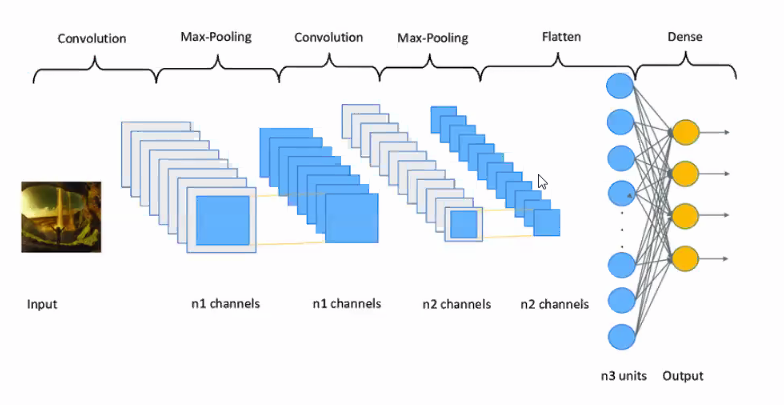

In [88]:
#!conda activate tf310
#!python -m pip install matplotlib

#import sys
#print(sys.executable)
#!{sys.executable} -m pip install --upgrade pip 
#!{sys.executable} -m pip install --upgrade matplotlib numpy pandas scikit-learn seaborn

### Cargar el Dataset de MINST


IMportemos el mdoulo de MINST desde keras

In [89]:
import tensorflow as tf
print(tf.__version__)

2.20.0


Carguemos los datos a nuestras tuplas clásicas de Train y test

In [90]:
from tensorflow.keras.datasets import mnist

In [91]:
(X_train, y_train), (X_test,y_test)= mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [92]:
X_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [93]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [94]:
X_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [95]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [96]:
%matplotlib inline

Importa matplotlib como plt

In [97]:
import matplotlib.pyplot as plt

Importa Seaborn

In [98]:
import seaborn as sns

Pon su escala a 2

In [99]:
sns.set(font_scale=2)

Importa Numpy

In [100]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [101]:
indice = np.random.choice(np.arange(len(X_train)), 24, replace=False)

In [102]:
indice # muestra de datos 

array([25829, 39699, 22708, 22089, 32743, 31326, 23263, 38882, 18680,
        4505, 59823, 44203, 58626, 59749, 46715, 11578, 35718, 25185,
       16916,  7975,  1359, 23158,  8031, 42929])

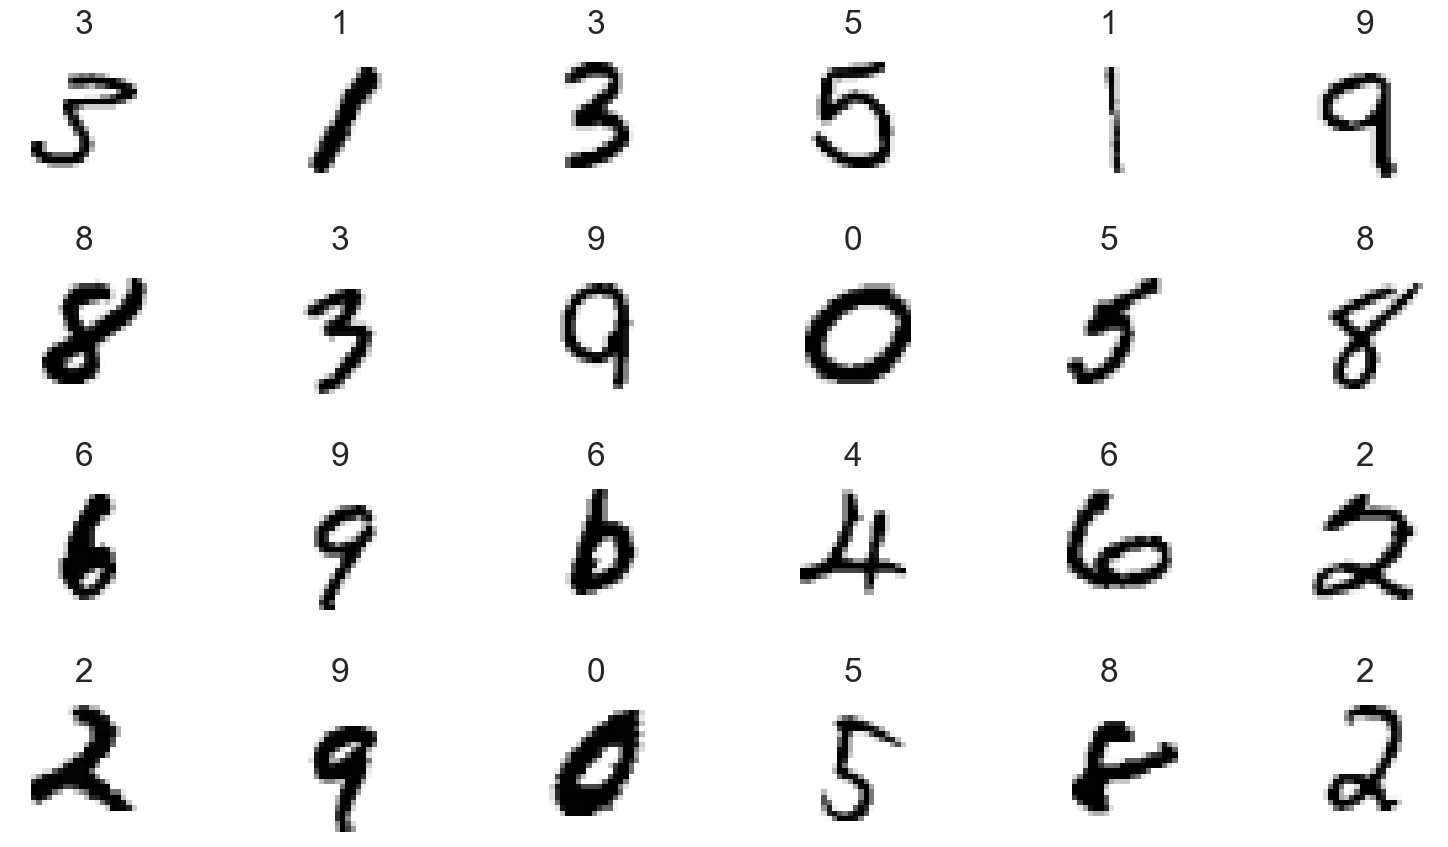

In [103]:
figure, axes = plt.subplots(nrows=4, ncols=6 ,figsize=(16,9))

for item in zip(axes.ravel(), X_train[indice],y_train[indice]):
    axes, image, target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [104]:
X_train = X_train.reshape((60000,28,28,1))

Checa su shape

In [105]:
X_train.shape

(60000, 28, 28, 1)

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [106]:
X_test = X_test.reshape((10000,28,28,1))

Checa su Shape

In [107]:
X_test.shape

(10000, 28, 28, 1)

Normaliza con astype Xtrain

In [108]:
X_train = X_train.astype("float32")/255
#normaliza los datos para escalar los dvalores de los px entre 0 y 1, lo que mejora el rendimiento y la estabilidad del modelo

Normaliza con astype Xtest

In [109]:
X_test = X_test.astype("float32")/255


###### Desde tensorflow importa to_categorical
    El one hot encoding convierte las etiquetas en vectores binarios
        Esto permite qu ela red neuronal trate cada clase como una ategoria indpendiente haciendolo mas rapido y legible para Keras

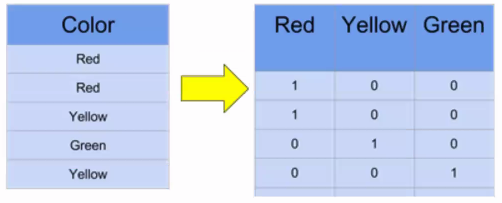

In [110]:
from tensorflow.keras.utils import to_categorical

aplicalo a Y_train

In [111]:
y_train = to_categorical(y_train)

Checa su shape

In [112]:
y_train.shape

(60000, 10)

Checa el primer dato de Y_train

In [113]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Aplica to_categorical a Y-test

In [114]:
y_test = to_categorical(y_test)

Checa su figura

In [115]:
y_test.shape

(10000, 10)

### Crear la Red Neuronal

Importa Sequential desde tf

In [116]:
from tensorflow.keras.models import Sequential

Crea tu objeto cnn

In [117]:
cnn = Sequential()

importa las capas que necesitaras desde tf

In [118]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense # Diferentes capas que van a formar nuestra "capa oculta"(Dense de salida, el resto capa oculta)

agrega la capa de Conv2d

Escanea toda la imagen(haciendo un filtro por agrupacion de 32 a 64(normalmente, puede variar))
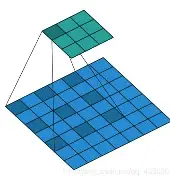

In [119]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))) # esto van a ser los datos procesador por la primera capa de convolucion

C:\Users\Techie3\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cnn.add(Conv2D # añade una capa convolucionada 2D extrae caracteristicas de las imagenes

    (filters=64,                  #Nº de filtros o mapas de caracteristicas (detectan patrones diferentes) 
    kernel_size=(3,3),            # tamaño del filtro o ventana que se desliza sobre la imagen
    activation="relu",            # Funcion de activacion ReLU: introduce no linealidad y evita valores
    input_shape=(28,28,1)))       # Tamaño especifico de la entrada

##### Ahora agrega una capa de Pooling2d

Sirve para evitar la sobreoptimizacion ((El entrenamiento sale perfecto pero al darle un nuevo dato que deberia ser reconocible no lo reconoce )) (((overfitting)))

Pooling2D usa Maxpooling (quita los datos que hagan que el algoritmo se vuelva demasiado especifico)
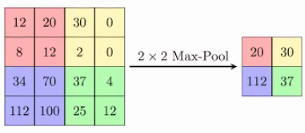

In [120]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [121]:
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))) # agregamos mas filtros para conectar mas caracteristicas en nuestras imagenes 

Y otra de Pooling

In [122]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplana los resultados (((Flatten aplana los resultados a una dimension 1*n)))

In [123]:
cnn.add(Flatten()) # de 5x5x28 a ,3200

In [124]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,496 (291.00 KB)

 Trainable params: 74,496 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

##### Agrega una capa DENSE

Ya tenemos caracteristicas asociadas a las imagenes hechas matriz, ahora les vamosa a pasar algo que sepan asociar esas caracteristicas

In [125]:
cnn.add(Dense(units=128,activation="relu"))
# capa totalmente conectada con 128 neuronas ocultas
# Capa neurona esta conectada con todas las salidas de la capa anterior (Flatten)
# La activacion ReLU introduce la no linealidad, permitiendo al modelo aprender patrones complejos

Y otra DENSE

In [126]:
cnn.add(Dense(units=128,activation="softmax"))
# capa de salida con 10 neurona, una por cada clase en mnist son digitos del 0 al 9
# la activacion softmax convierte las salidas en probabilidades que suman 1
# esto indica la probabilidad de que la imagen pertenezca a cada digito

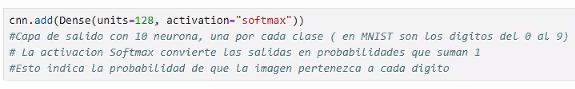

Imprime el resultado en un resumen

In [127]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,736 (1.91 MB)

 Trainable params: 500,736 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

Compila tu modelo

In [ ]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

cnn.compile(                           

    optimizer="adam",                  # Algoritmo que ajusta los pesos(Adam es eficiente y adaptativo)
    loss="categorical_crossentropy",   # funcion de perdida para clasificacion multiclase ()
    metrics=["accuracy"])              # metrica que evalua el rendimiento (% de aciertos)

## Hasta aqui solo llevamos es diseñar nuestro propio estimador 

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [128]:
cnn.fit? 
# x, y datos de entrenamiento / etiquetas
#epochs = nº de veces que un modelo deberia procesar todo el set de datos 
# batch_size = nº de muestras a procesar una vez durante un epoch

Signature:
cnn.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(inpu

Evalua le modelo con Evaluate

Vamos a hacer predicciones

checa que dice el primer elemento de ytest

Y ahora que dice el primer elemento del modelo

Ubiquemos las predicciones incorreectas

Obten el largo de esa lista

Visualiza las predicciones incorrectas

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

Muestra una que otra predicción incorrecta a detalles

### Guardar tu Modelo

## Analisis de Sentimientos con Redes Neuronales - IMDB

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

Carga las 10000 palabras que mas ocurren

Carga tus palabras en tus datasets X_train y X_test y asi

### Exploracion de Datos

Figura de X_train

Figura de Y_train

Figura de X_test

Figura de y_test

Apaga pretty print

Checa un elemento cualquiera de X_train

Llama la función word to index

Checa el indice de la palabra "bad"

Reversa el mapeo del diccionario Word to INdex a Index to Word

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

Ok, ya estamos listos para leer una reseña

Y revisa de Y_train la clasificacion de esta reseña

### Preparación de datos

Define palabras_por_reseña en 200

Importa pad_sequences de tensroflow

Define X_train como pad_sequences del viejo X_train

Checa el nuevo shape de X_train

Hay que reconfigurar X_Test tambien

Checa su figura

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

Checa la figura de xtest

Y la de XVal

### Crear la red neuronal

Desde Tensorflow importa Sequencial

arma el objeto rnn com oun sequential

Importa las capas Dense y LSTM

Importa Embedding

Agrega la capa de Embedding, que salgan 128 dimensiones

agrega la capa de LSTM

Agrega una capa DENSE

Compila el RNN

Y resvisa el resultado de RNN

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

Checa tus resultados

Y revisa el resultado